# 데이터의 특성

- 모든 연속형 변수를 두 번 이상 측정하면 다른 값이 나온다. 이 때 변수의 측정값이 변하는 경향을 `변동(variation)`이라고 말한다.<br>
범주형 변수 역시 서로 다른 피실험자 또는 다른 시간을 측정하는 경우 다를 수 있다.<br>
결국 각각의 측정값은 서로 다른 약간의 오차를 포함하는데<br> 
이 때 모든 변수들은 **고유한 변동 패턴**을 가지고 있고 이러한 패턴을 이해하는 가장 좋은 방법은 변수들 값의 분포를 시각화 하는 것이다. 

## 시각화

In [42]:
library('tidyverse')

`-` 범주형 변수

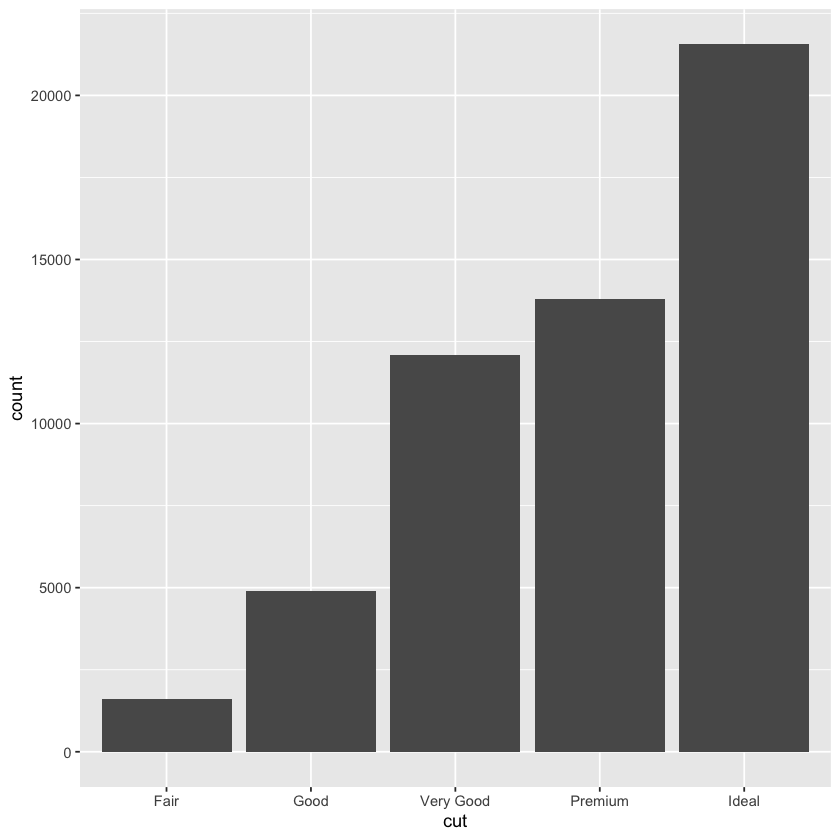

In [2]:
ggplot(data = diamonds) + 
geom_bar(mapping = aes(x = cut))

In [3]:
diamonds %>% count(cut)

cut,n
<ord>,<int>
Fair,1610
Good,4906
Very Good,12082
Premium,13791
Ideal,21551


`-` 연속형 변수

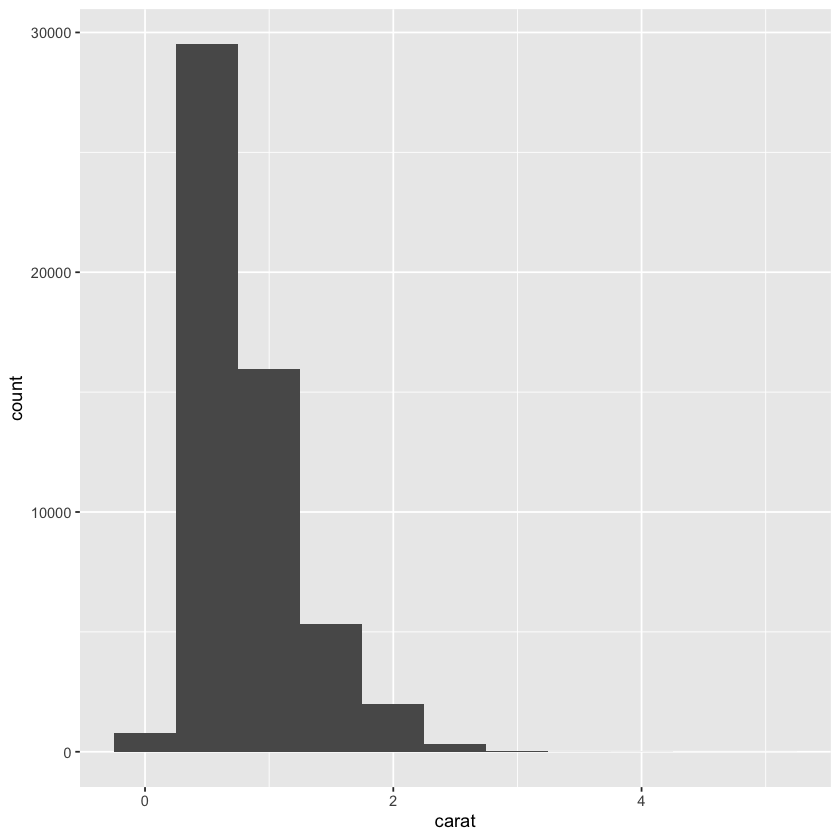

In [4]:
ggplot(data = diamonds) +
geom_histogram(mapping = aes(x= carat), binwidth = 0.5)

In [5]:
diamonds %>%
count(cut_width(carat, 0.5))

"cut_width(carat, 0.5)",n
<fct>,<int>
"[-0.25,0.25]",785
"(0.25,0.75]",29498
"(0.75,1.25]",15977
"(1.25,1.75]",5313
"(1.75,2.25]",2002
"(2.25,2.75]",322
"(2.75,3.25]",32
"(3.25,3.75]",5
"(3.75,4.25]",4


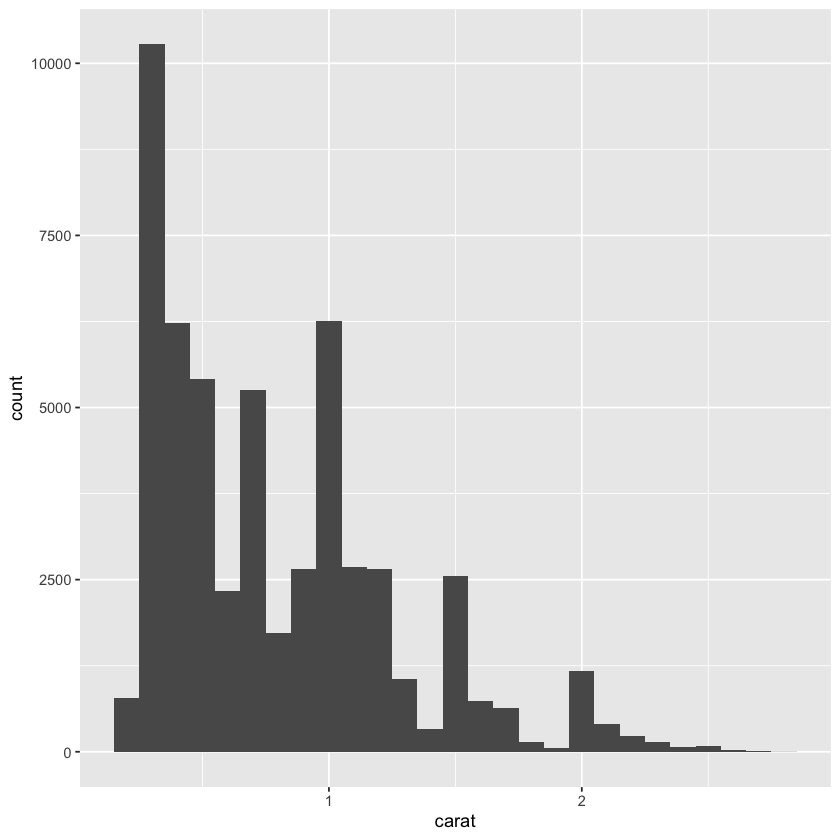

In [6]:
smaller <- diamonds %>%
filter(carat < 3)

ggplot(data = smaller, mapping = aes(x = carat)) +
geom_histogram(binwidth = 0.1)

`geom_freqpoly` : 같은 플롯에서 여러개의 히스토그램을 겹처서 그리기

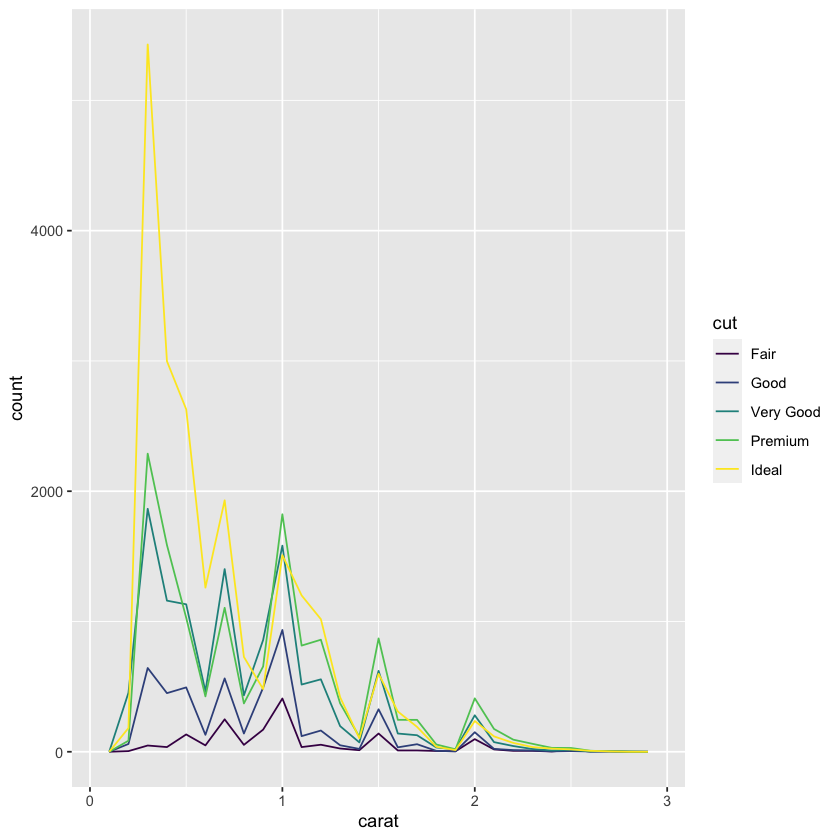

In [7]:
ggplot(data = smaller, mapping = aes(x = carat, color = cut)) +
geom_freqpoly(binwidth = 0.1)

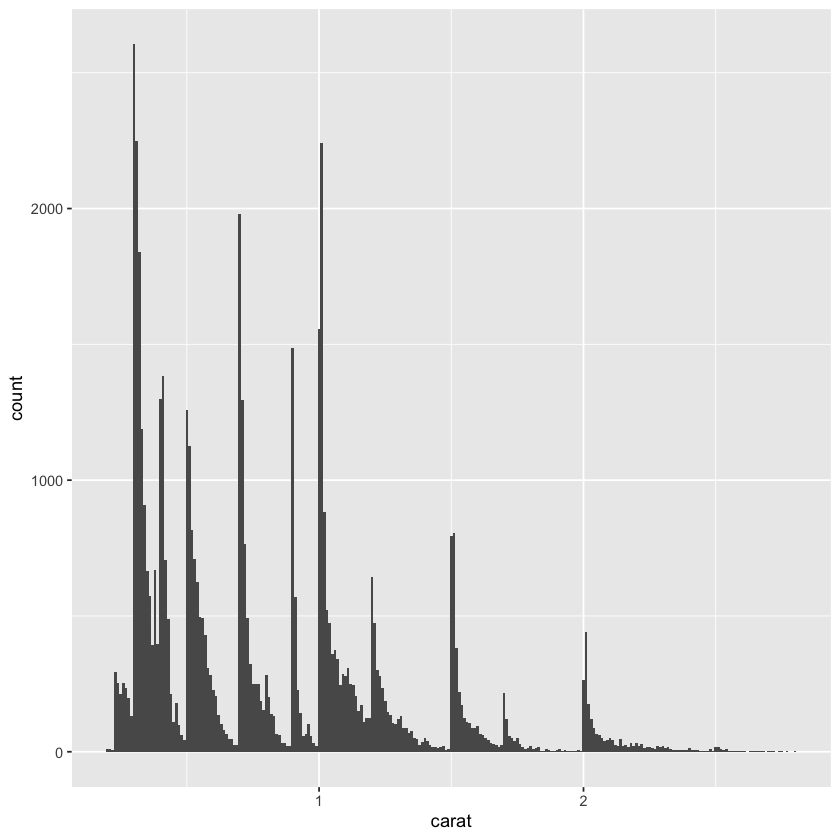

In [8]:
ggplot(data = smaller, mapping = aes(x = carat)) +
geom_histogram(binwidth = 0.01)

- 위의 그래프는 일부 캐럿의 다이아몬드가 많은 의문을 자아낸다.<br>일반적이라면 정규분포 혹은 고르게 분포할 것으로 예상해 볼 수 있겠다.

In [9]:
faithful %>% head #Yellowstone 분출간격 자료

,eruptions,waiting
,<dbl>,<dbl>
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85
6,2.883,55


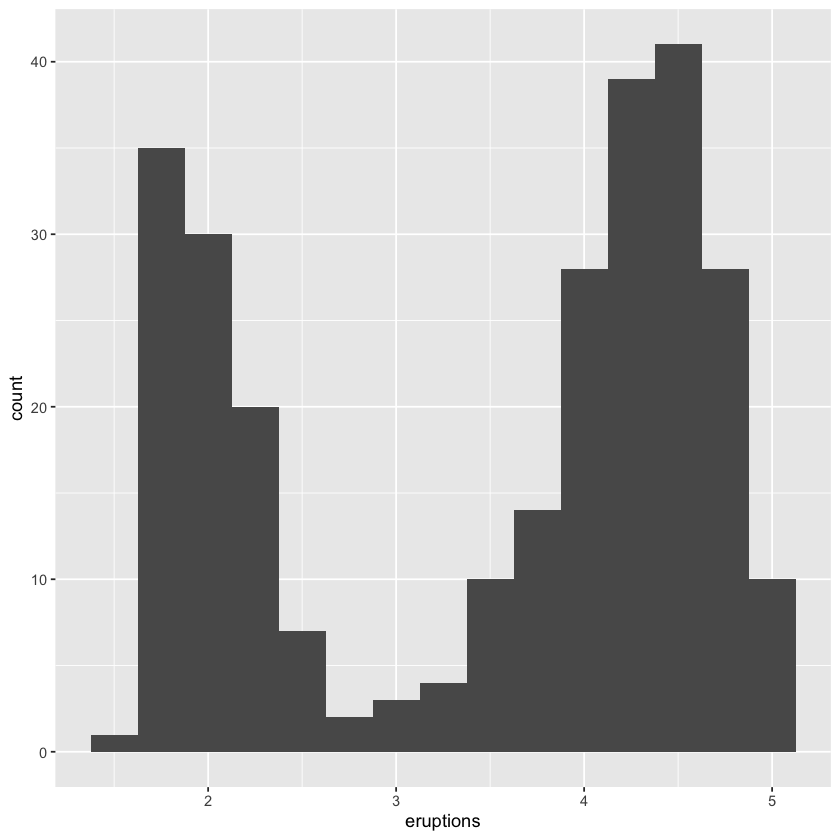

In [10]:
ggplot(data = faithful, mapping = aes(x = eruptions)) + 
geom_histogram(binwidth = 0.25)

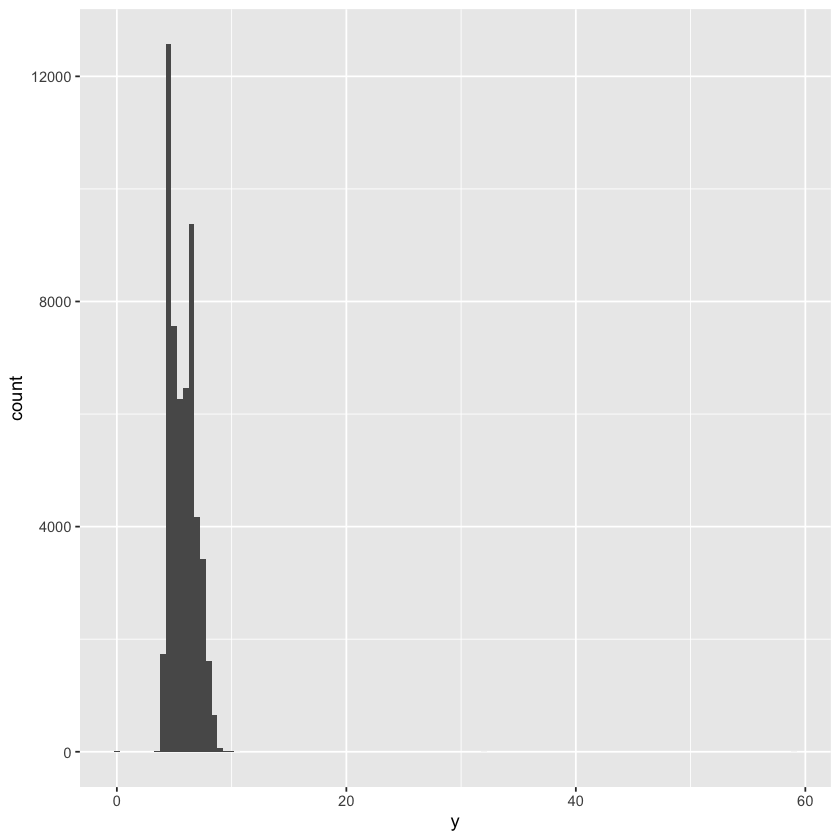

In [11]:
ggplot(diamonds) +
geom_histogram(mapping = aes(x = y), binwidth = 0.5)

- 이런 특정한 구간에 관측값이 쏠려 있는 경우 이상값을 알아내기 어려움.<br>그래서 보고 싶은 구간을 확대해서 본다.

`coord_cartesian` : x축 or y축의 지정한 특정 범위를 확대해서 보여줌.

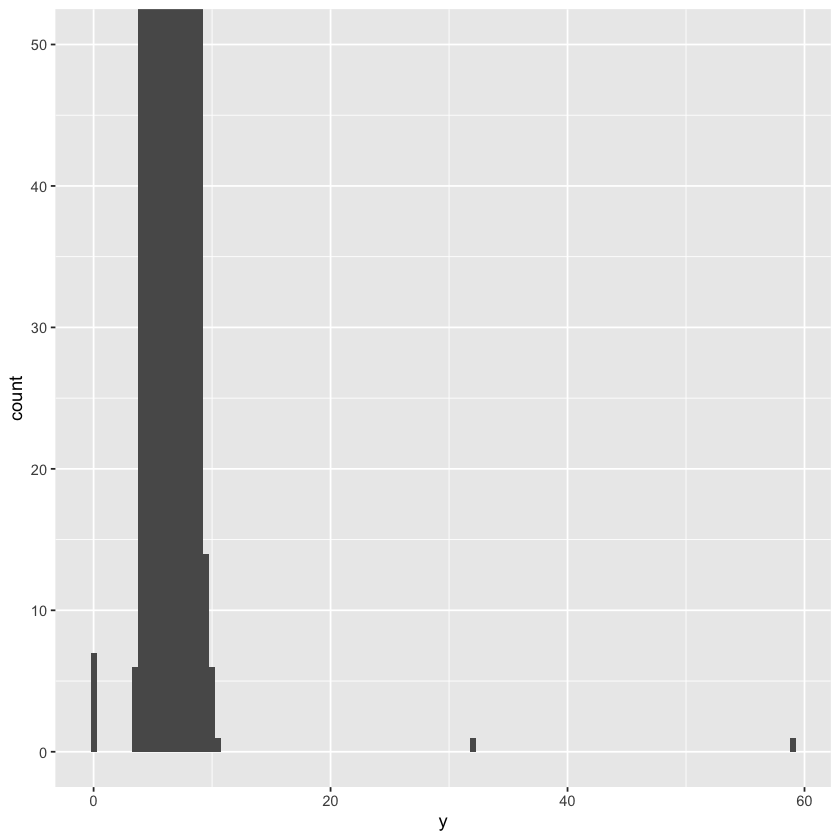

In [12]:
ggplot(diamonds) +
geom_histogram(mapping = aes(x = y), binwidth = 0.5) +
coord_cartesian(ylim = c(0, 50))

- 원본 y축이 0~ 12,000 범위였는데 0 ~ 50 구간으로 확대해서 본 모습<br> 보이지 않던 이상치들이 보이기 시작함.

`-` 위의 그래프에서 보인 두개의 이상값 추출하기 위해 범위를 특정해서 필터링해보기

In [13]:
unusual <- diamonds %>%
filter(y < 3 | y > 20) %>%
select(price, x, y, z) %>%
arrange(y)

In [14]:
unusual

price,x,y,z
<int>,<dbl>,<dbl>,<dbl>
5139,0.00,0.0,0.00
6381,0.00,0.0,0.00
12800,0.00,0.0,0.00
15686,0.00,0.0,0.00
18034,0.00,0.0,0.00
2130,0.00,0.0,0.00
2130,0.00,0.0,0.00
2075,5.15,31.8,5.12
12210,8.09,58.9,8.06


### 결측값

 - 이상값 처리법 두가지<br> 1) 이상값이 포함된 행 전체를 지운다.<br> 2) 이상값을 결측값으로 변경한다.

1) 지우기(다른 측정값은 유용할 수도 있으므로 권장되지 않음)

In [15]:
diamonds2 <- diamonds %>%
filter(between(y, 3, 20))

In [16]:
diamonds2 %>% head

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


2) 이상값 -> 결측값

In [17]:
diamonds2 <- diamonds %>%
mutate(y = ifelse(y < 3 | y > 20, NA, y))
diamonds2 %>% head

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


Warning message:
“Removed 9 rows containing missing values (geom_point).”


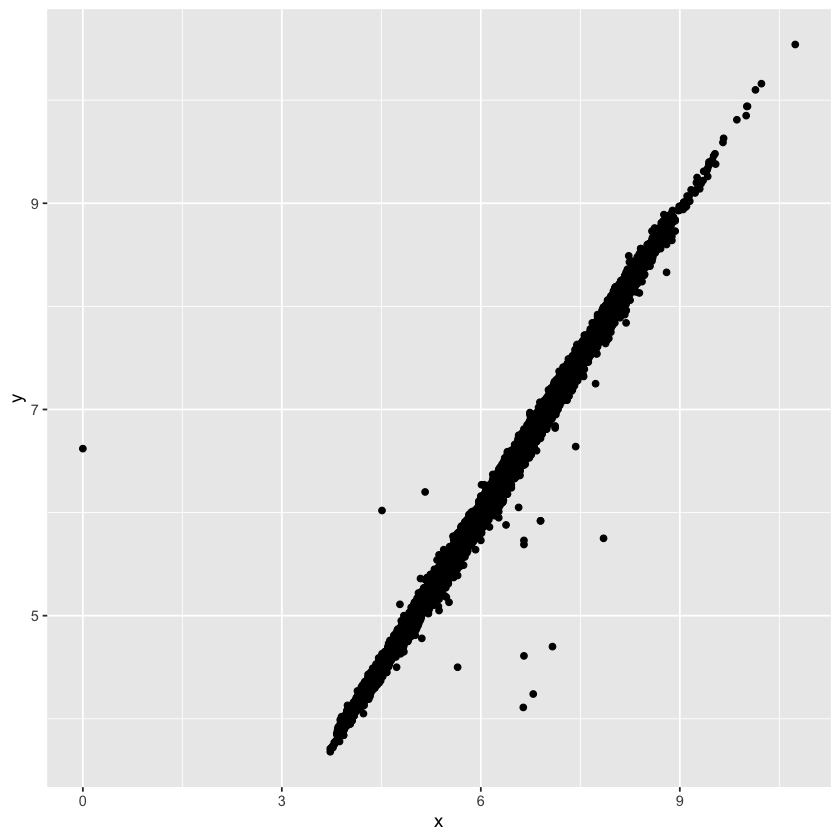

In [18]:
ggplot(data = diamonds2, mapping = aes(x = x, y = y)) +
geom_point()

In [19]:
library('nycflights13') #13년도 뉴욕항공편 데이터

여기서<br>
```R
nycflights13::flights$dep_time
```
값이 NA인 값은 해당 항공편 운항이 취소된 것을 의미 

`-` 취소된 비행기의 예정 출발 시각과 취소되지 않은 비행기의 출발 시각 비교해보기

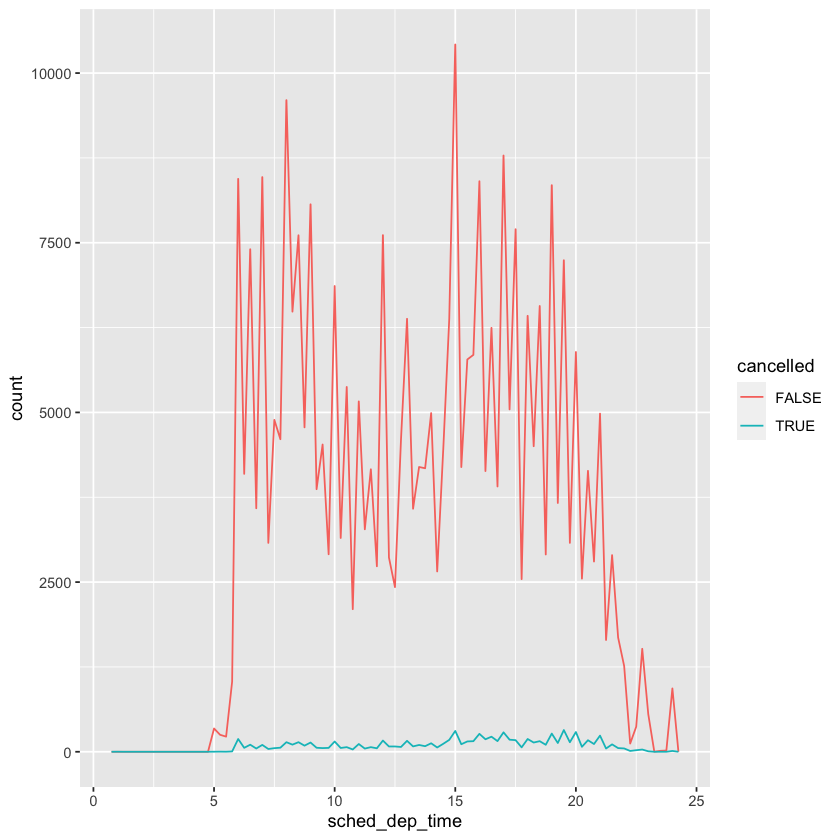

In [20]:
nycflights13::flights %>%
mutate(
    cancelled = is.na(dep_time),
    sched_hour = sched_dep_time %/% 100,
    sched_min = sched_dep_time %% 100,
    sched_dep_time = sched_hour + sched_min / 60
    ) %>%
ggplot(mapping = aes(sched_dep_time)) +
geom_freqpoly(
    mapping = aes(color = cancelled),
    binwidth = 1/4
    )

- 그래프는 제대로 그려졌으나 취소된 항공편이 취소되지 않은 항공편에 비해 현저히 적기 때문에 이 플랏은 유용하지 않음.<br>
TRUE가 FALSE와 비슷한 수준(count)이라면 유의미한 비교가 가능할듯.(시계열 자료 느낌)

### 공변동

변동이 변수 내의 움직임을 설명한다면 `공변동(covariation)`은 변수들 간의 움직임을 설명한다.<br>
즉, **공변동**은 둘 이상의 변숫값이 연관되어 동시에 변하는 경향

- 공변동을 시각화 방법은 변수의 유형에 따라 달라진다.

`-` 기존의 방식의 문제는 빈도수가 차이날 때 변수들의 움직임이 잘 보이지 않는다는 것이다.

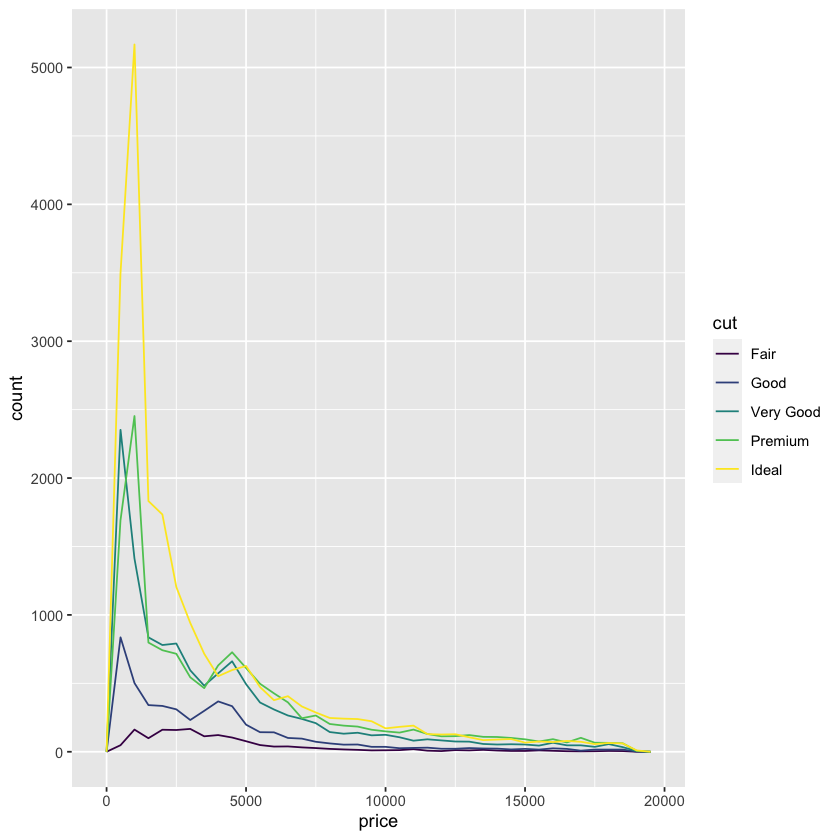

In [21]:
ggplot(data = diamonds, mapping = aes(x = price)) +
geom_freqpoly(mapping = aes(color = cut), binwidth = 500)

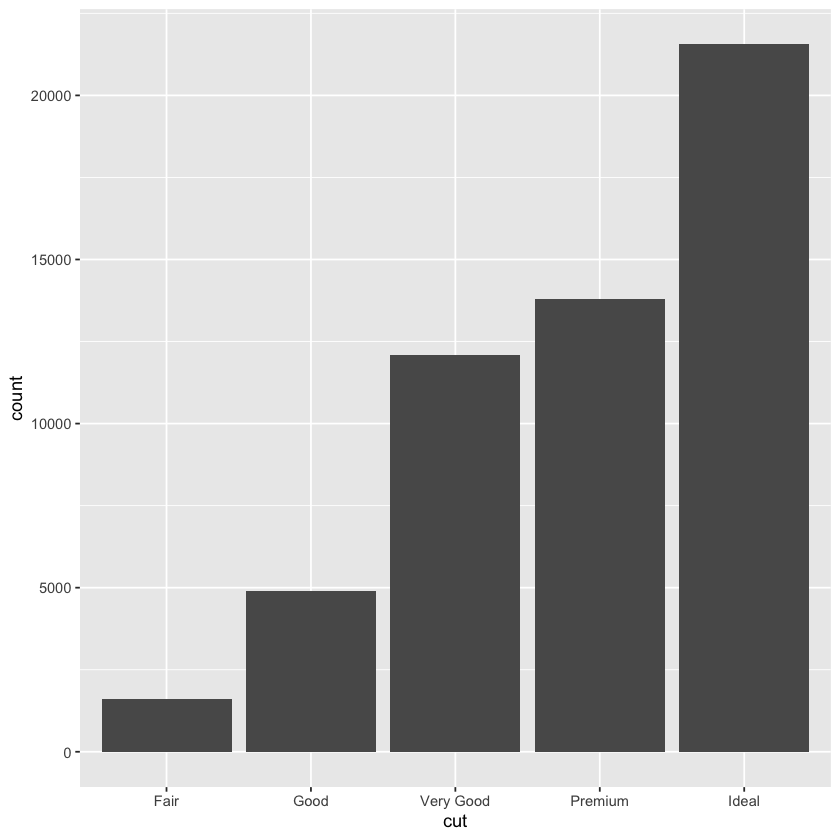

In [22]:
ggplot(diamonds) +
geom_bar(mapping = aes(x = cut))

#### 방법1) density

`..density..` : 전체적인 빈도수가 다르기에 큰 그래프에 작은 그래프들이 묻혀 모든 그래프들의 추이를 비교하기에는 어려움.(특히 빈도가 작아서 잘 안보이는 것들)<br>
`density`를 사용하면 그래프 아래 넓이를 1로 고정시켜주기에 각각의 추이 자체만을 비교할 때 도움이 된다.<br>
이런식으로 안쓰고 `geom_density()` 형태로도 사용가능

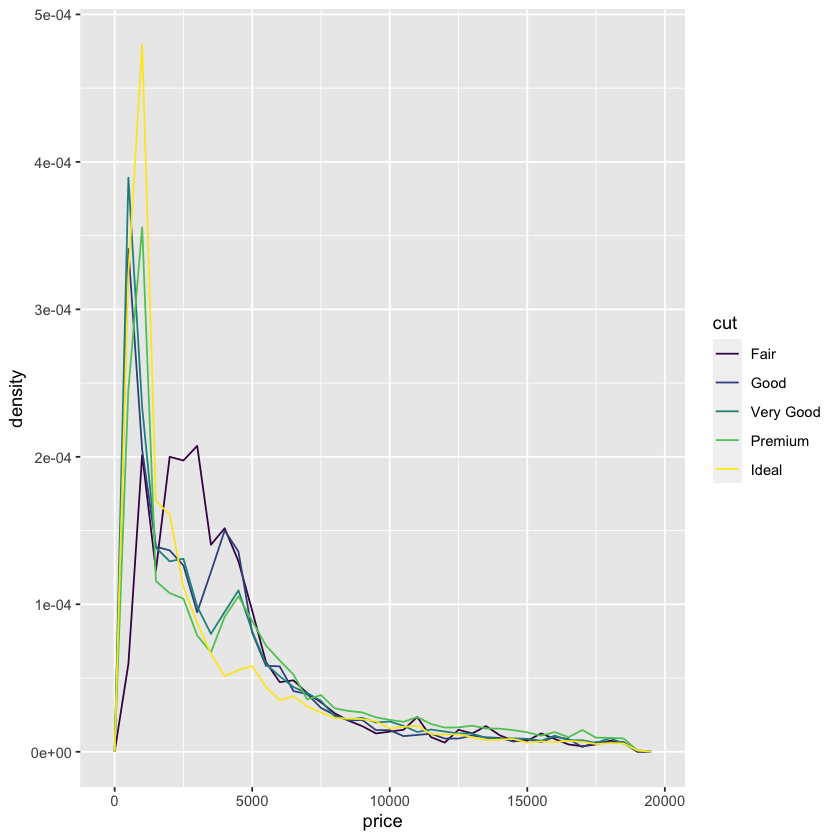

In [23]:
ggplot(
    data = diamonds,
    mapping = aes(x = price, y = ..density..)
    ) +
geom_freqpoly(mapping = aes(color = cut), binwidth = 500)

- 범주형 변수로 구분된 연속형 변수의 분포를 나타내는 또 다른 방법은 `boxplot`

#### 방법2) boxplot

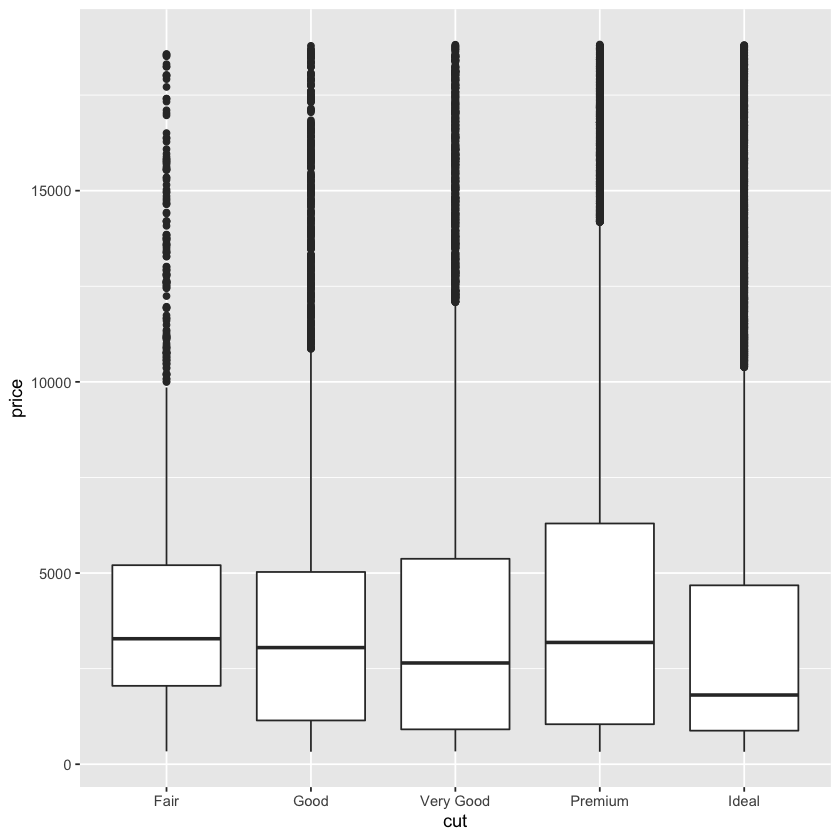

In [24]:
ggplot(data = diamonds, mapping = aes(x = cut, y= price)) +
geom_boxplot()

- 박스 플롯은 분포에 대해 더 적은 정보를 확인할 수 있지만, 간단하므로 쉽게 비교할 수 있다.<br>
위의 플롯에서 얻을 수 있는 정보는 '더 좋은 품질의 다이아몬드가 평균적으로는 더 저렴하다'는 직관에 반하는 사실이다.

#### 순서가 없는 변수의 공변동

- cut의 경우 fair ~ ideal까지 순서에 따라 나열된 것을 비교해 분석해 보았다.<br>
하지만, 대부분의 범주형 변수에는 이러한 고유한 순서가 없기에 순서를 변경하여 더 유용한 정보를 제공하도록 표현할 수 있다.<br>
이 때, `reorder`사용

`reorder` : 순서 재 정렬

`-` mpg데이터 셋의 class 변수의 hwy를 순서 없이 그냥 나열한 plot

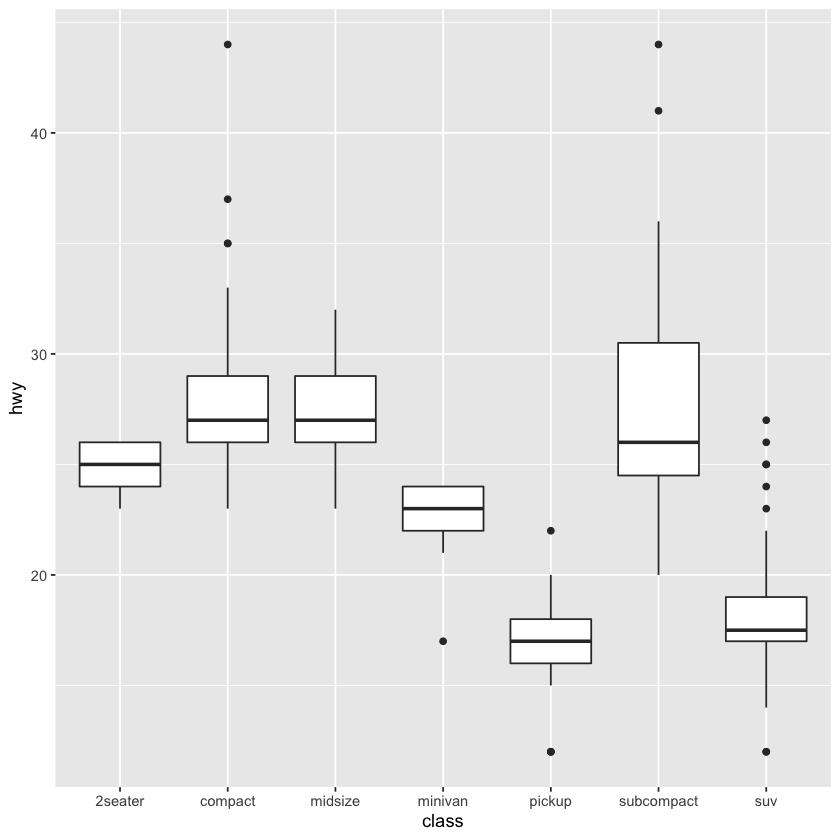

In [25]:
ggplot(data = mpg, mapping = aes(x = class, y= hwy)) +
geom_boxplot()

`-` 추세를 더 쉽게 파악하기 위해 hwy 변수의 중간값을 기준으로 class변수의 순서를 변경

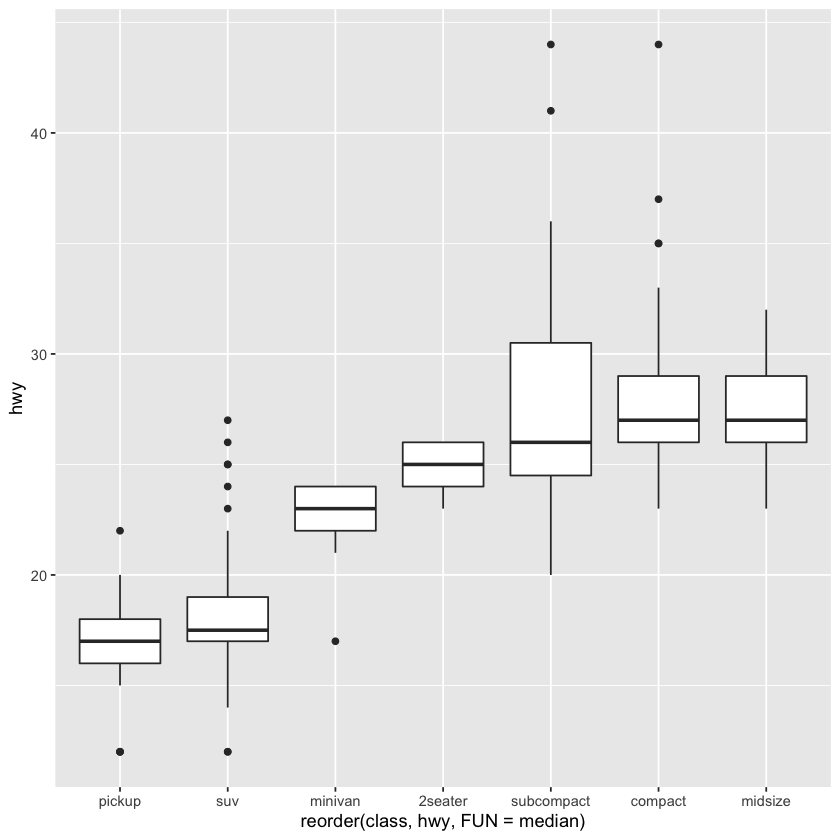

In [26]:
ggplot(data = mpg) +
geom_boxplot(
    mapping = aes(
        x = reorder(class, hwy, FUN = median),
        y = hwy
        )
    )

`-` 변수의 이름이 길다면 `coord_flip`으로 축 변경

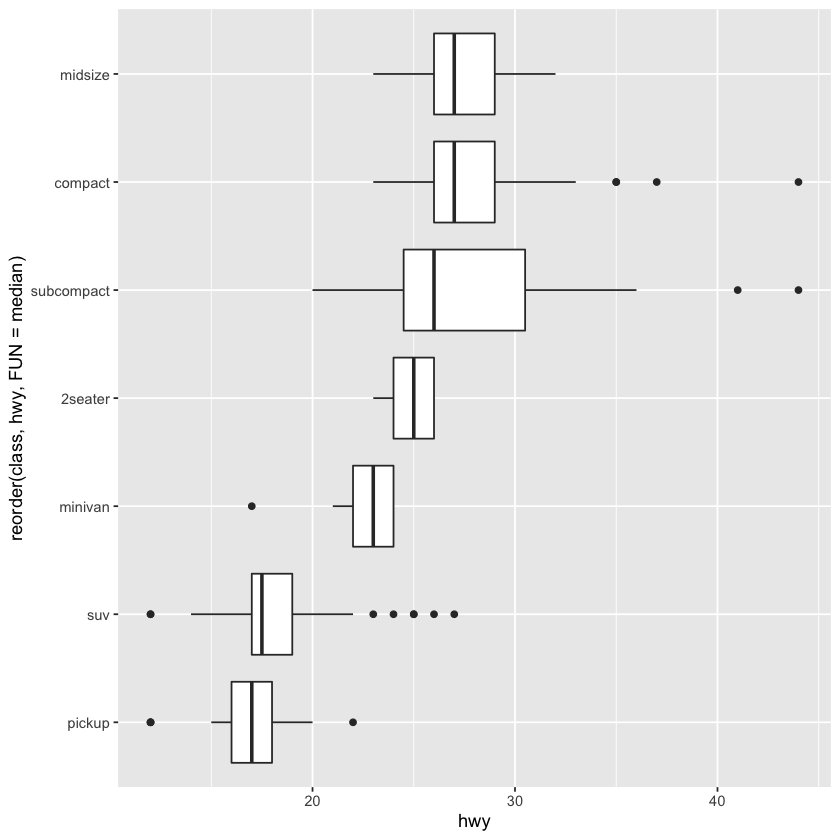

In [27]:
ggplot(data = mpg) +
geom_boxplot(
    mapping = aes(
        x = reorder(class, hwy, FUN = median),
        y = hwy
        )
    ) +
coord_flip()

##### 1) 두 개의 범주형 변수 사이의 공변동 시각화하기

`geom_count` : 각 조합에 대한 관측값 수 count

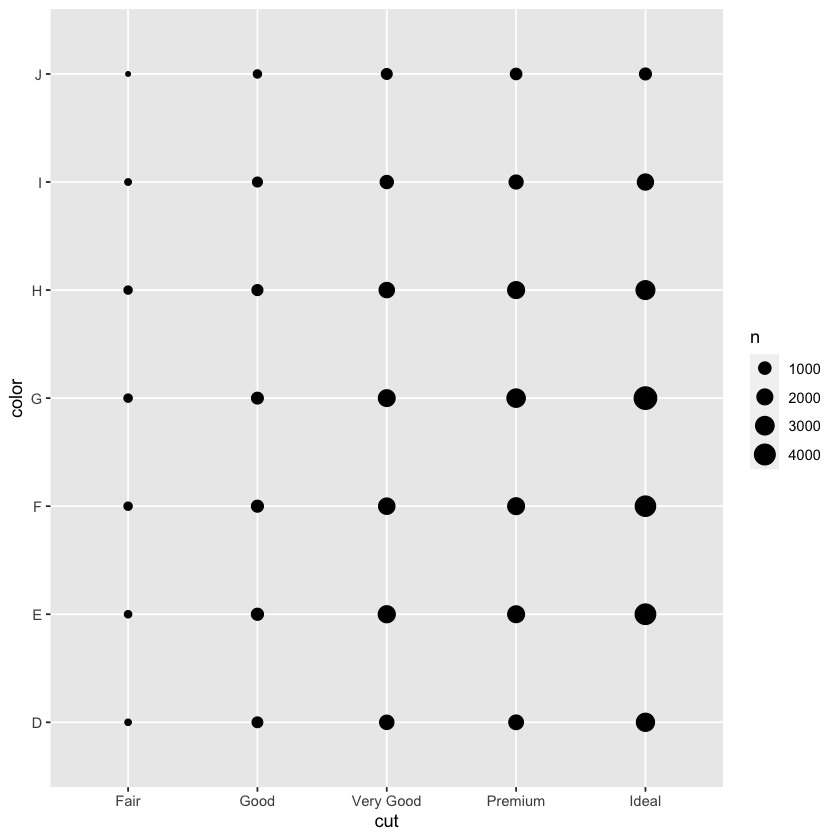

In [28]:
ggplot(data = diamonds) +
geom_count(mapping = aes(x = cut, y= color))

`count` : n()과 역할 같음, 다만 더 간단하다

In [29]:
diamonds %>%
count(color, cut) %>% head

color,cut,n
<ord>,<ord>,<int>
D,Fair,163
D,Good,662
D,Very Good,1513
D,Premium,1603
D,Ideal,2834
E,Fair,224


`-` `geom_tile()`함수와 `fill`심미성으로 시각화

> 심미성 : 점의 크기, 모양, 색깔 같이 객체를 다르게 표현하는 속성

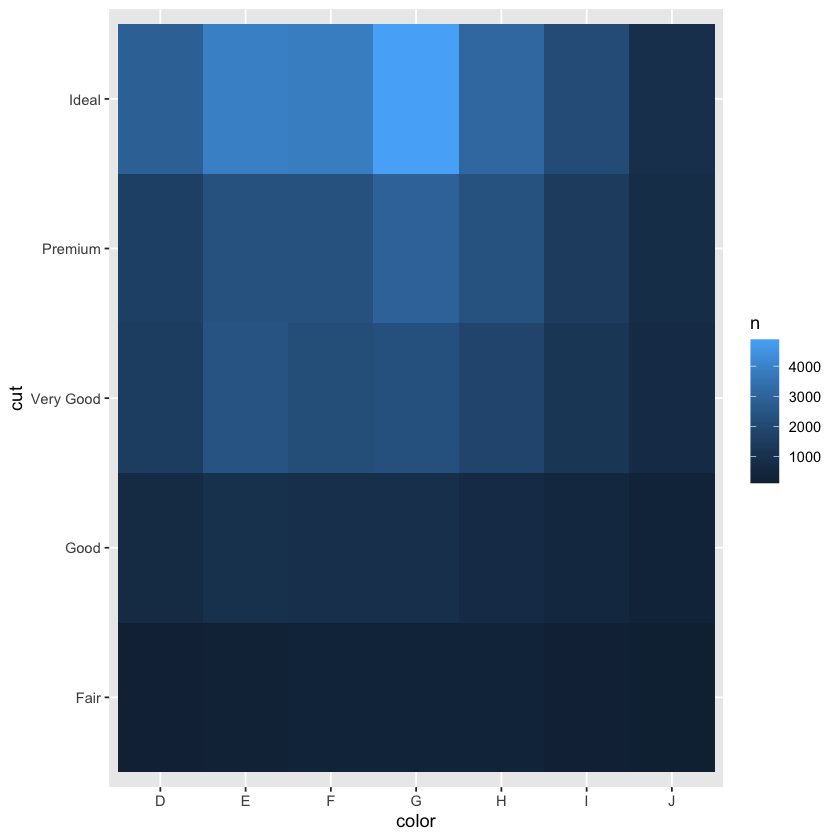

In [30]:
diamonds %>%
count(color, cut) %>%
ggplot(mapping = aes(x = color, y = cut)) +
geom_tile(mapping = aes(fill = n))

##### 2) 두 개의 연속형 변수 사이의 공변동 시각화하기

`-` `geom_point`사용

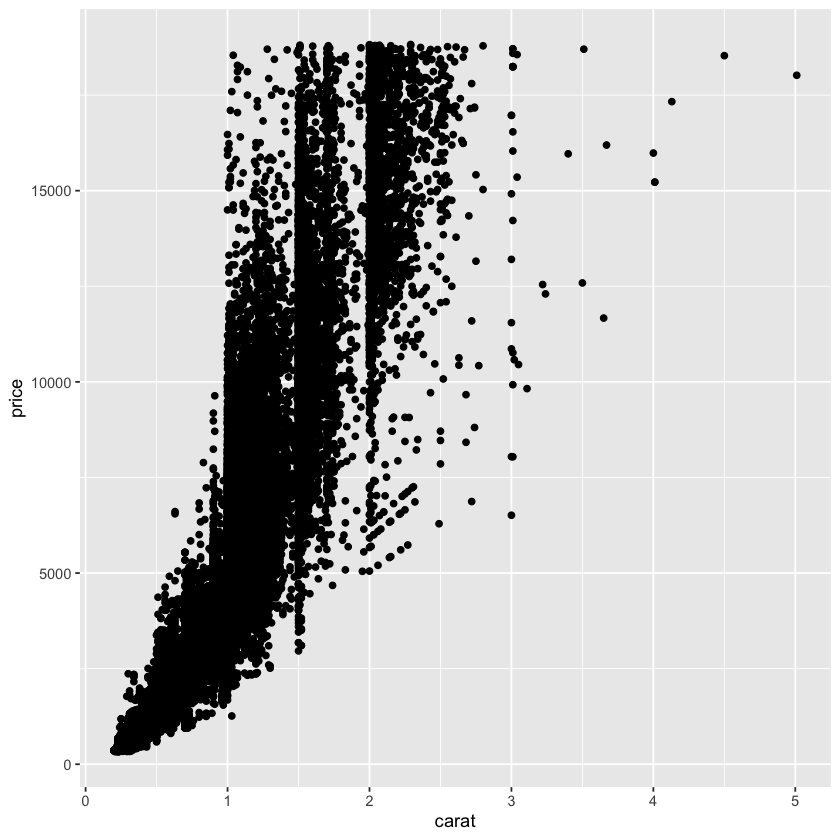

In [31]:
ggplot(data = diamonds) +
geom_point(mapping = aes(x = carat, y = price))

`-` 겹칠 때 잘 안보이므로 `alpha`사용

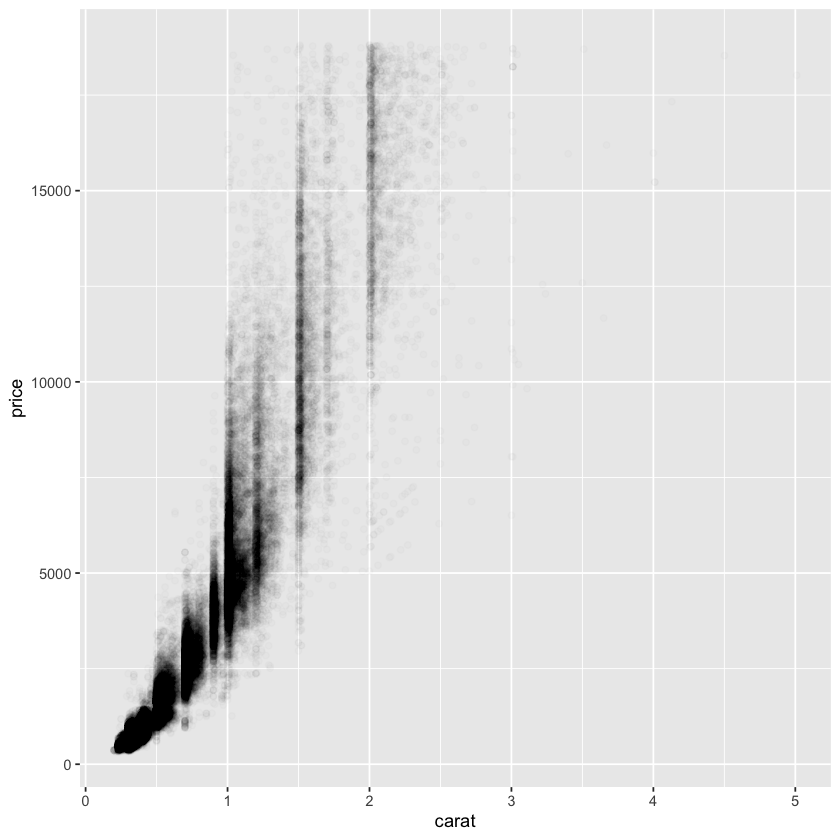

In [32]:
ggplot(data = diamonds) +
geom_point(
    mapping = aes(x = carat, y= price),
    alpha = 0.01
    )

- 매우 큰 데이터셋에서는 투명도의 효과가 미비할 수도 있다. <br>
이 때는 `bin`을 사용한다. 이전에 사용한 `geom_histogram`, `geom_freqpoly`은 1차원의 빈이다.<br>
`geom_bin2d`, `geom_hex` 는 2차원의 빈<br>
이들은 좌표 평면을 2D 빈으로 나눈 후, 각 빈에 몇 개의 점이 해당하는지 나타내기 위해 색상 채우기를 사용<br>
이 때, `geom_bin2d`는 직사각형 빈을 만들고, `geom_hex`는 육각형 빈을 만든다.

In [33]:
library('hexbin')

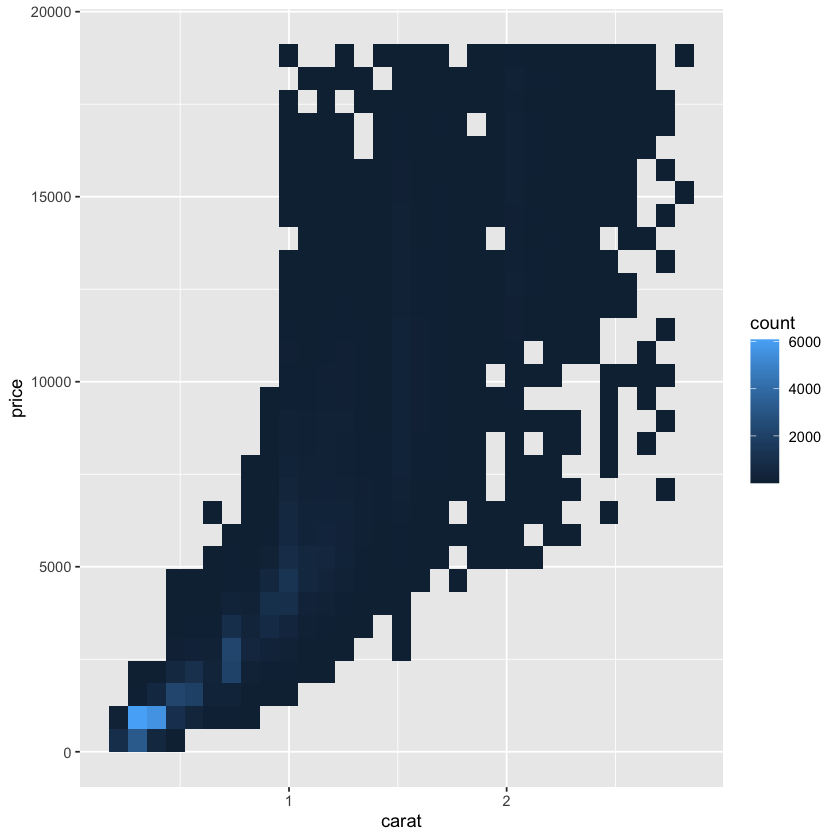

In [34]:
ggplot(data = smaller) +
geom_bin2d(mapping = aes(x = carat, y = price))

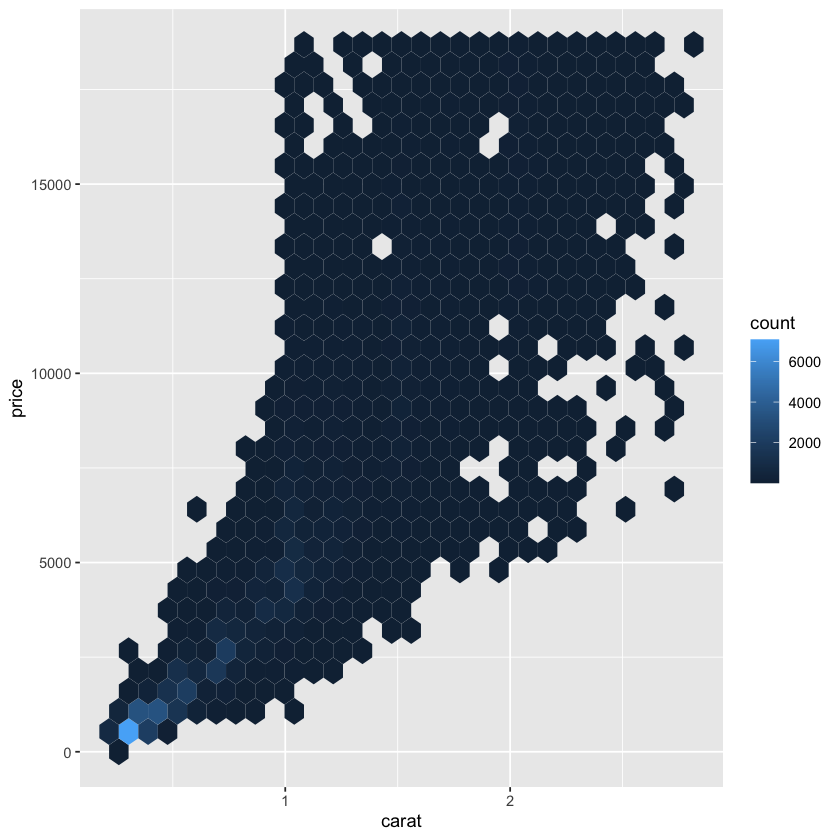

In [35]:
ggplot(data = smaller) +
geom_hex(mapping = aes(x = carat, y = price))

`-` (앞에 나옴) 연속 변수를 그룹화하여 범주형 변수처럼 만들기

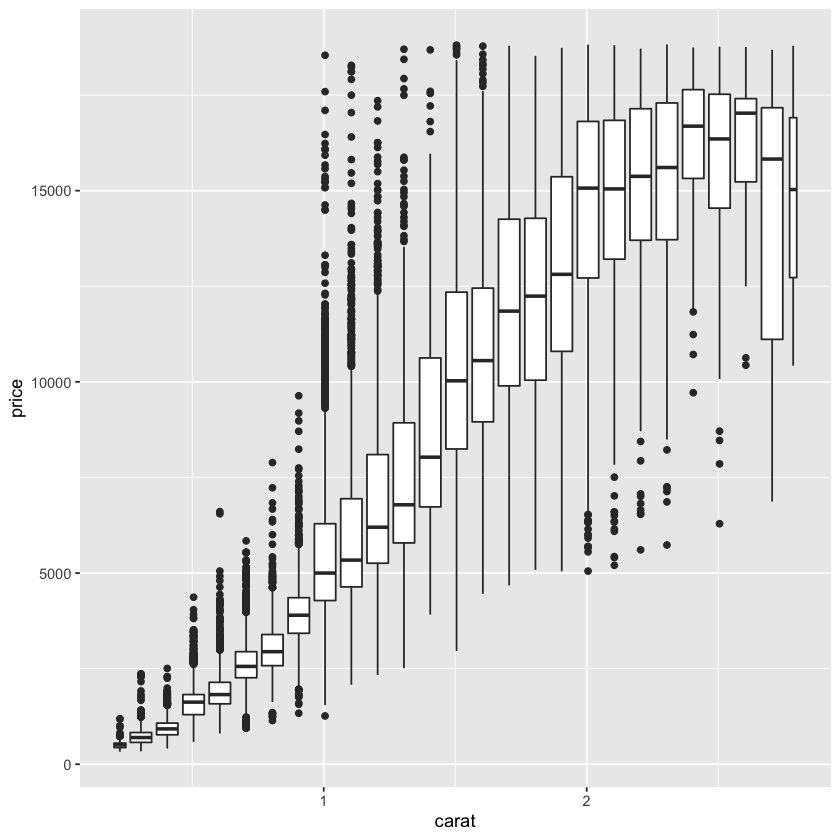

In [36]:
ggplot(data = smaller, mapping = aes(x = carat, y= price)) +
geom_boxplot(mapping = aes(group = cut_width(carat, 0.1)))

- 이것의 문제는 관측값의 개수는 무시하고 보여주기에 빈도에 대한 정보는 없음<br>
다음은 관측값 수까지 반영한 방법이다.<br>
`varwidth = TRUE` : 이제 박스 플롯의 너비는 점의 개수와 비례한다<br>
유사한 방법으로 `cut_number` : 각 빈에 대략 같은 수의 점을 표시

`-` `cut_number`이용

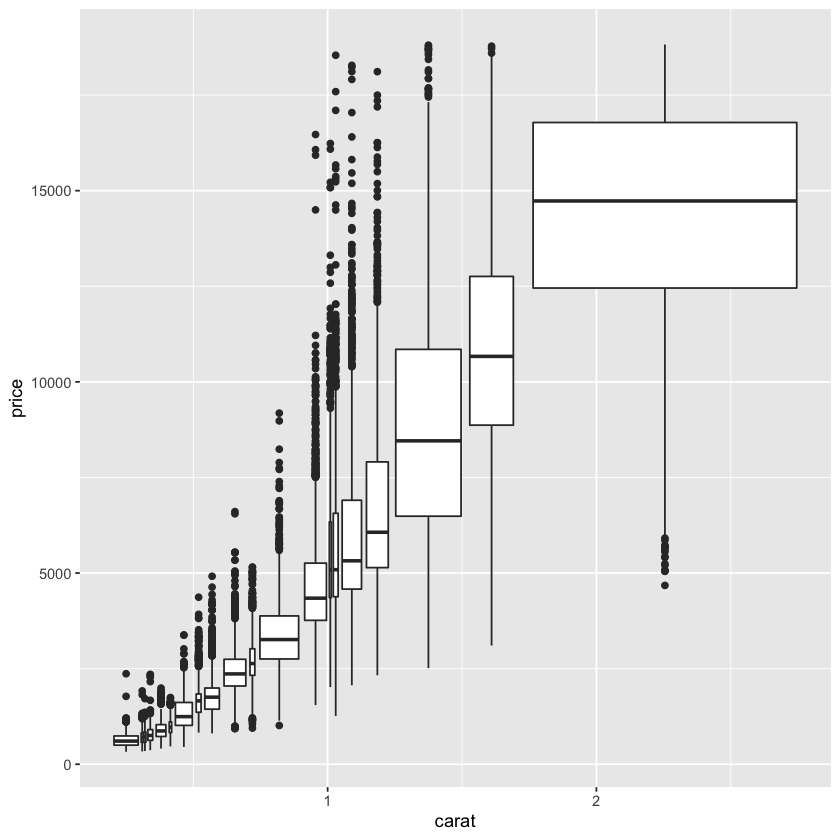

In [37]:
ggplot(data = smaller, mapping = aes(x = carat, y = price)) +
geom_boxplot(mapping = aes(group = cut_number(carat, 20)))

#### 패턴과 모델(★)-심화

- 데이터의 패턴은 상관관계에 대한 단서를 제공한다. 두 변수 사이에 규칙적인 관계가 존재하면 데이터의 패턴으로 나타난다. 패턴을 발견하게 되면 스스로에게 질문해본다.<br>
> 이 패턴은 우연의 일치(즉, 랜덤한 가능성) 때문인가?<br>
패턴이 내포하는 상관관계를 어떻게 설명할 수 있는가?<br>
패턴이 내포하는 상관관계는 얼마나 강한가?<br>
다른 변수가 그 상관관계에 영향을 줄 수 있는가?<br>
데이터의 개별 하위집단을 살펴보면 상관관계가 변경되는가?

`-` Old Faithful 분출 시간과 분출 사이의 시간 사이의 산점도는 분출 사이의 대기 시간이 길수록 분출 시간도 길어지는 패턴을 보인다.

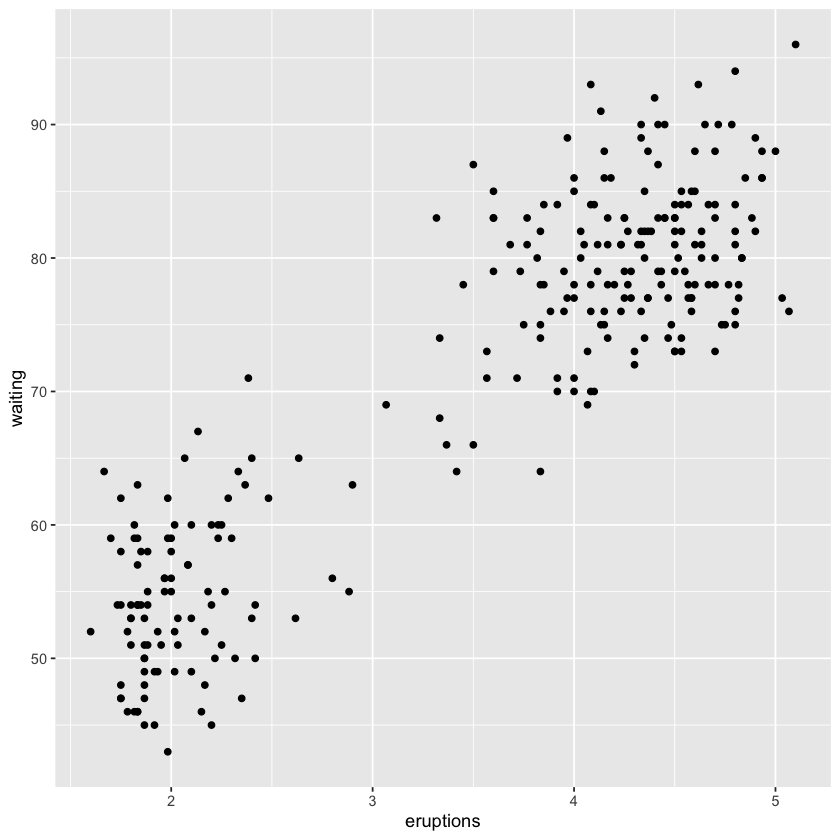

In [38]:
ggplot(data = faithful) +
geom_point(mapping = aes(x = eruptions, y = waiting))

> 변동이 불확실성이 만드는 현상으로 생각한다면 공변동은 불확실성을 감소시키는 현상이다.<br>
두 개의 변수가 함께 변동하면 한 변수의 값을 사용하여 다른 변수의 값을 잘 예측할 수 있다.<br>
인과관계(특별한 경우)로 인해 공변동이 생기는 경우, 한 변수의 값을 다른 변수의 값을 통제하는 데 사용할 수 있다.<br>
모델은 데이터에서 패턴을 추출하는 도구이다.<br>
다이아몬드 데이터에서 컷팅과 캐럿, 캐럿과 가격은 밀접하게 관려노디어 있으므로 컷팅과 가격의 상관관계를 이해하기 어렵다.<br>
모델을 활용하여 가격과 캐럿 간의 매우 강력한 상관관계를 제거하면 남아있는 중요한 세부요소들을 탐색할 수 있다.

`-` 다음은 carat으로 price를 예측하는 모델을 적합시킨 다음, 잔차(예측값과 실제값의 차이)를 계산한다. <br>
캐럿의 효과가 제거되면 잔차는 다이아몬드의 가격에 대한 관점을 제공하기에

In [39]:
library('modelr')

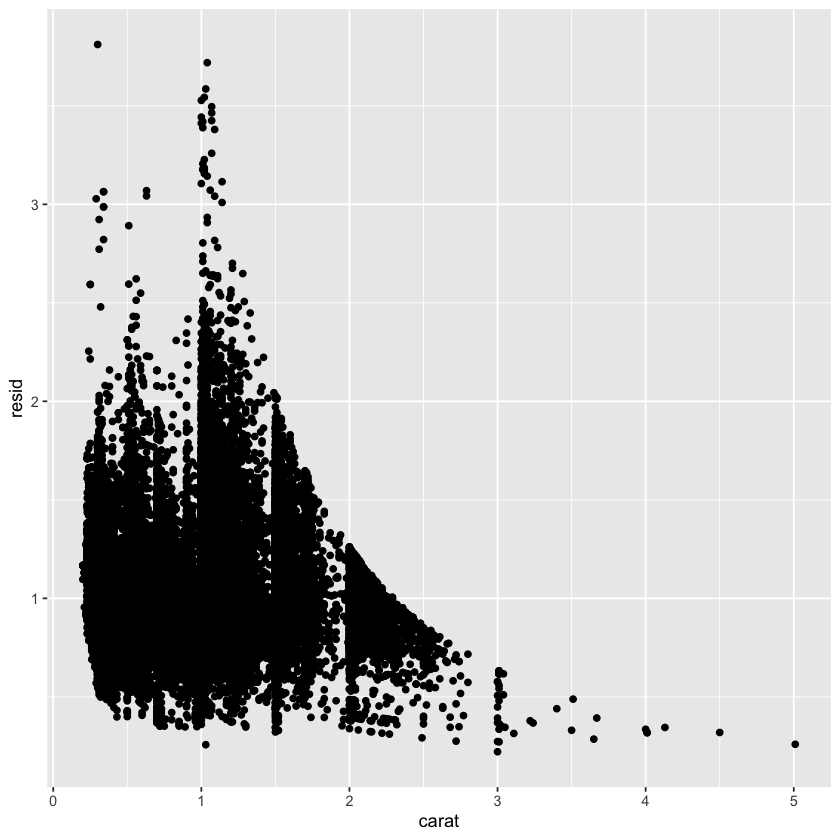

In [40]:
mod <- lm(log(price) ~ log(carat), data = diamonds)

diamonds2 <- diamonds %>%
add_residuals(mod) %>%
mutate(resid = exp(resid))

ggplot(data = diamonds2) +
geom_point(mapping = aes(x = carat, y = resid))

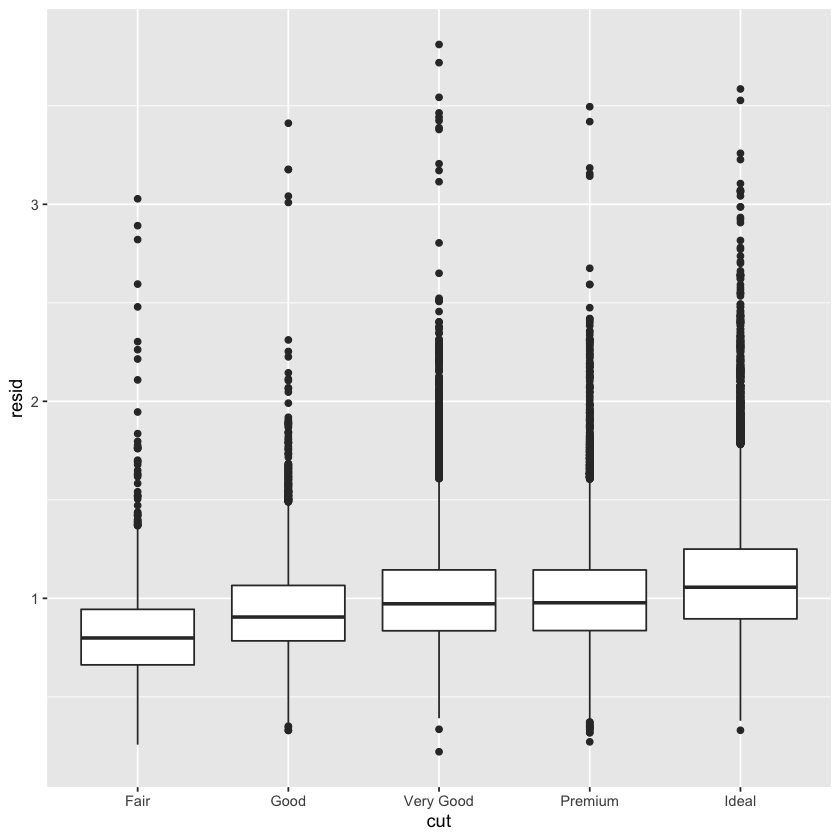

In [41]:
ggplot(data = diamonds2) +
geom_boxplot(mapping = aes(x = cut, y = resid))